In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay

In [2]:
# Load the diabetes dataset
diabetes = pd.read_csv('diabetesNHANES.csv')

# take a random sample of 100 rows
df = diabetes.sample(n=100, random_state=4321)
df.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
544,101169,no,5.05,7.41,232,0,71,148
1339,96441,no,4.27,5.92,189,0,89,150
772,97452,no,5.61,10.20,186,0,73,109
266,99662,yes,7.22,28.84,196,1,74,149
1147,101550,no,5.44,19.06,209,0,77,115


In [3]:
# Define input features and output features
X = df[['glucose', 'cholesterol', 'systolic']]
y = df[['insulin']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Initialize and fit a k-nearest neighbors model with k=3
KNModel = KNeighborsRegressor(n_neighbors=3)
KNModel.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

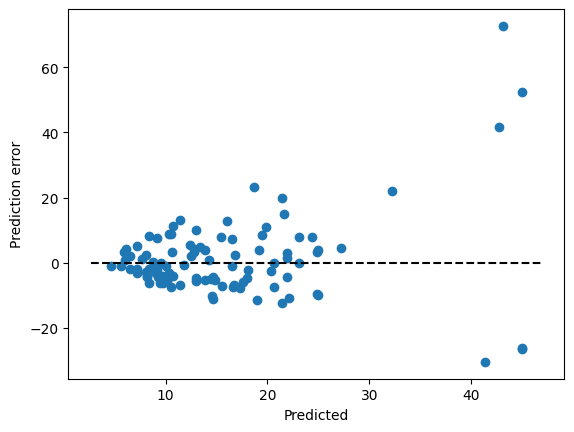

In [5]:
# Generate a prediction error plot

# Get predictions
KNPred = KNModel.predict(X)

# Compute prediction errors
KNPredError = y - KNPred

# Plot prediction errors vs predicted values
fig = plt.figure()
plt.scatter(KNPred, KNPredError)
plt.xlabel('Predicted')
plt.ylabel('Prediction error')

# Add dashed line at y=0
plt.plot([min(KNPred)-2, max(KNPred)+2], [0,0], linestyle='dashed', color='black')
plt.show()

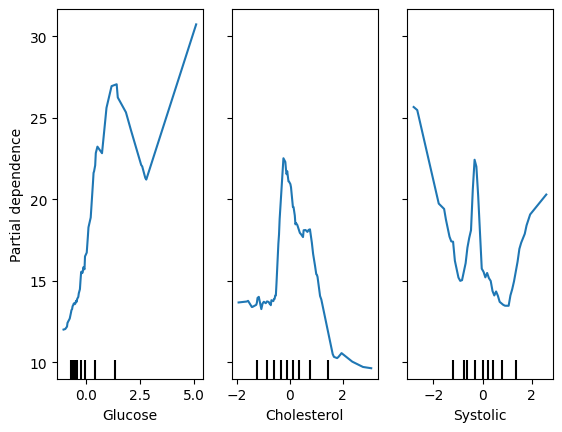

In [6]:
# Generate a parial dependence display for all three input features
# Add feature_names parameter to specify the plot labels 

PartialDependenceDisplay.from_estimator(KNModel, X, features = [0, 1, 2],
                                       feature_names = ['Glucose', 'Cholesterol', 'Systolic'])
plt.show()

## Multiple linear regression model

In [7]:
# Initialize and fit a multiple linear regression model
LinRegModel = LinearRegression()
LinRegModel.fit(X,y)

LinearRegression()

### Add code below to generate plots for the fitted multiple linear regression model

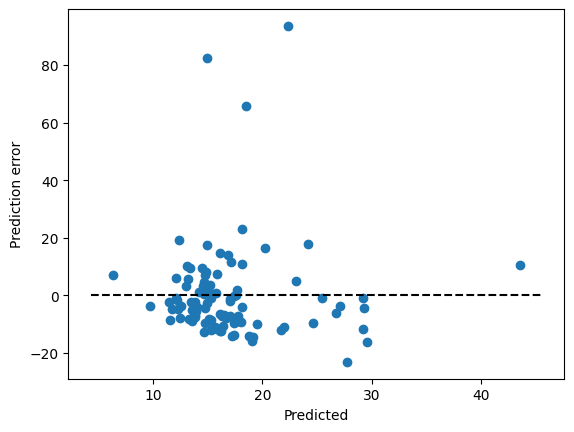

In [8]:
# Generate a prediction error plot

# Get predictions
linPred = LinRegModel.predict(X)

# Compute prediction errors
linPredError = y - linPred

# Plot prediction errors vs predicted values
fig = plt.figure()
plt.scatter(linPred, linPredError)
plt.xlabel('Predicted')
plt.ylabel('Prediction error')

# Add dashed line at y=0
plt.plot([min(linPred)-2, max(linPred)+2], [0,0], linestyle='dashed', color='black')
plt.show()

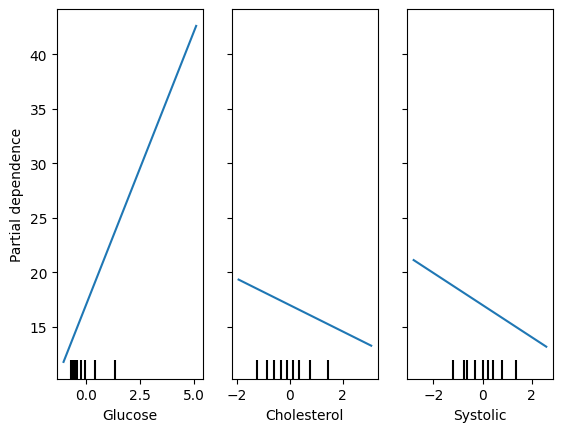

In [9]:
# Generate a parial dependence display for all three input features
# Add feature_names parameter to specify the plot labels 

PartialDependenceDisplay.from_estimator(LinRegModel, X, features = [0, 1, 2],
                                       feature_names = ['Glucose', 'Cholesterol', 'Systolic'])
plt.show()